# BDA Final Project on the Analysis of Climate Change: Earth Surface Temperature Data

The temperature has changed significantly between the early 1990s and the present.The dataset is sourced from the Berkeley Earth Surface Temperature project and covers the time period from 1750 to 2013. Hence by analysing this dataset, important information on the average land temperature as well as data combining average land and ocean temperatures can be obtained.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading CSV file from S3 bucket

In [2]:
s3_csv_path = f's3://group13deliverable2/climate/archive/GlobalLandTemperaturesByCity.csv'
cities = pd.read_csv(s3_csv_path)
cities

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
8599207,2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E


In [3]:
cities.shape

(8599212, 7)

In [4]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [5]:
cities.describe

<bound method NDFrame.describe of                  dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmar

# Data preprocessing / Date Cleaning

In [6]:
cities.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

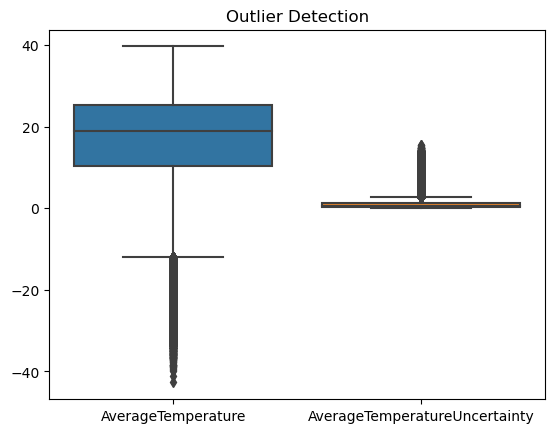

In [7]:
sns.boxplot(data=cities)
plt.title("Outlier Detection")
plt.show()

In [8]:
cities['AverageTemperature'].fillna(cities['AverageTemperature'].mean(), inplace=True)
cities['AverageTemperatureUncertainty'].fillna(cities['AverageTemperatureUncertainty'].mean(), inplace=True)

In [9]:
cities.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [10]:
duplicate = cities[cities.duplicated()]
print("Duplicate rows:", len(duplicate))
print(duplicate)

Duplicate rows: 0
Empty DataFrame
Columns: [dt, AverageTemperature, AverageTemperatureUncertainty, City, Country, Latitude, Longitude]
Index: []


# Heap Map displaying the corelation between Average Temperature and Average Temperature Uncertainity

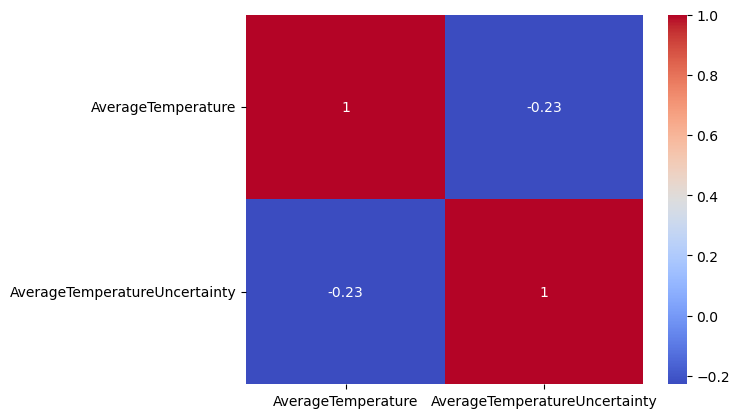

In [11]:
corr = cities.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [12]:
cities.corr()['AverageTemperature']

AverageTemperature               1.000000
AverageTemperatureUncertainty   -0.228159
Name: AverageTemperature, dtype: float64

array([[<AxesSubplot: title={'center': 'AverageTemperature'}>,
        <AxesSubplot: title={'center': 'AverageTemperatureUncertainty'}>]],
      dtype=object)

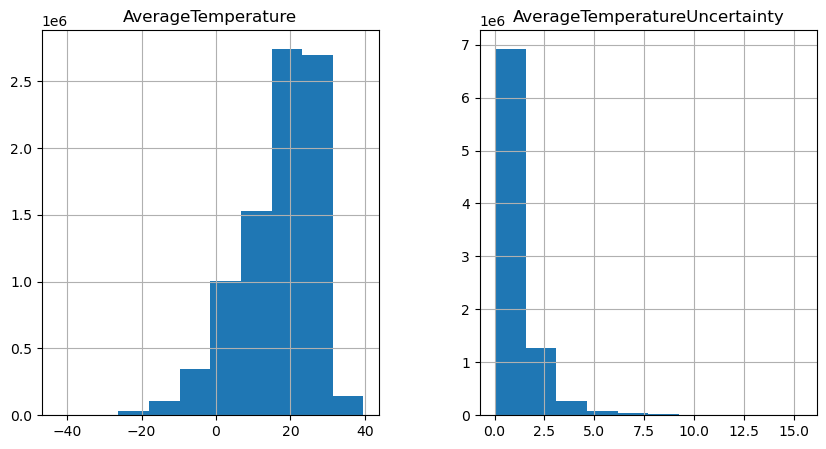

In [13]:
cities.hist(figsize=(10,5))

# Line plot to visualize how the global average temperature has changed over time.

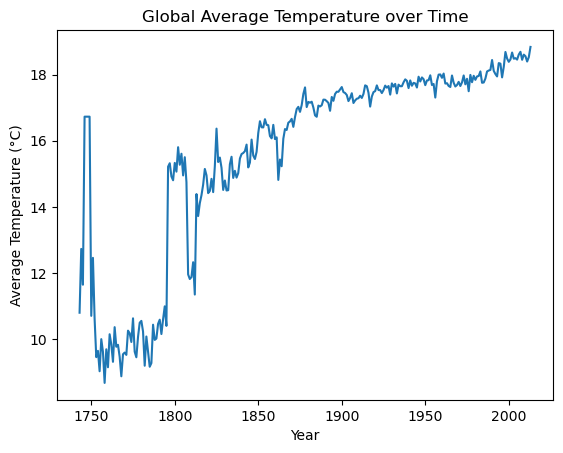

In [14]:
cities['dt'] = pd.to_datetime(cities['dt'])

# Group data by year and calculate average temperature
yearly_temps = cities.groupby(cities['dt'].dt.year)['AverageTemperature'].mean()

# Create a line plot of average temperature over time
plt.plot(yearly_temps.index, yearly_temps.values)
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Global Average Temperature over Time')
plt.show()

# Scatter plot to visualize the relationship between temperature uncertainty and average temperature

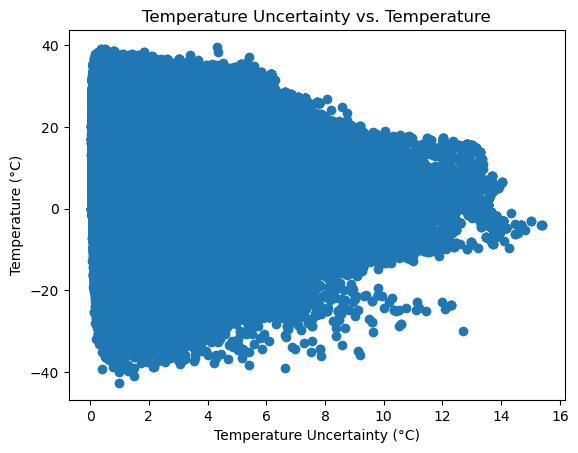

In [15]:
plt.scatter(cities['AverageTemperatureUncertainty'], cities['AverageTemperature'])
plt.xlabel('Temperature Uncertainty (°C)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Uncertainty vs. Temperature')
plt.show()

# Distribution plot to visualize the distribution of temperature 

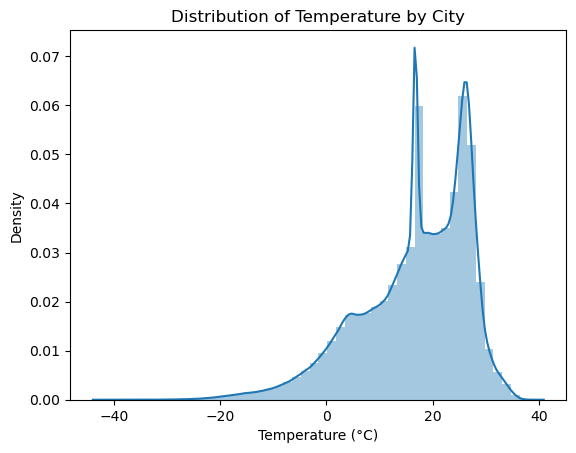

In [16]:
sns.distplot(cities['AverageTemperature'])
plt.xlabel('Temperature (°C)')
plt.title('Distribution of Temperature by City')
plt.show()


# This Compares the temperature changes over time in Charlotte with the average temperature changes in all other cities in the dataset.

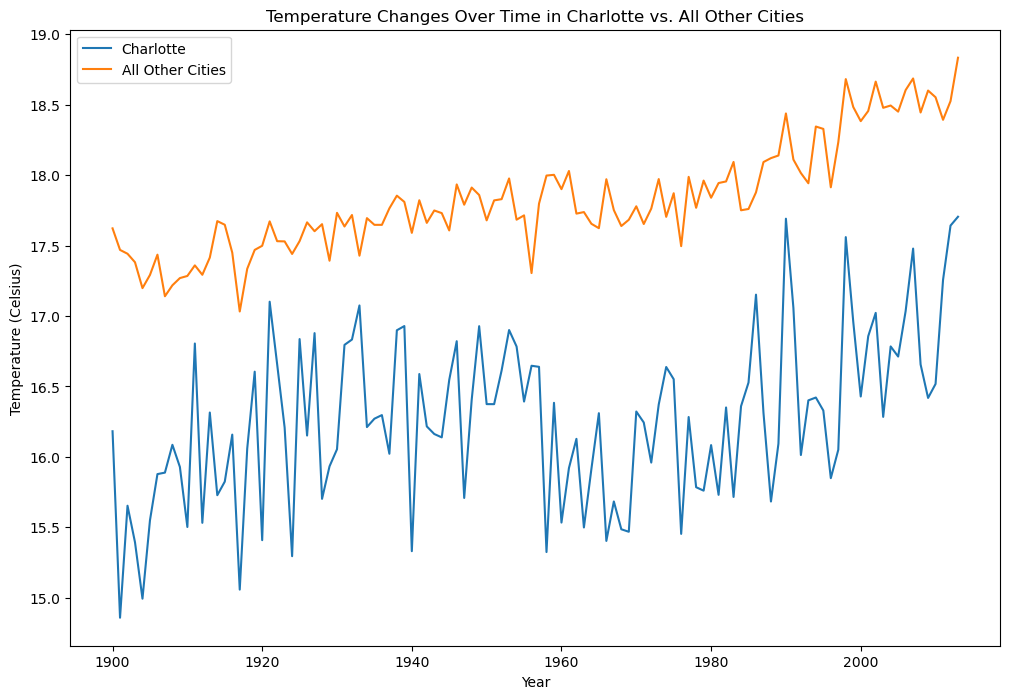

In [17]:
clt = cities[cities['City'] == 'Charlotte'].copy()
clt['dt'] = clt['dt'].astype(str)
#other_cities['dt'] = other_cities['dt'].astype(str)
cities['dt'] = cities['dt'].astype(str)

clt = clt[clt['dt'].str.startswith('19') | clt['dt'].str.startswith('20')].copy()
#other_cities = other_cities[other_cities['dt'].str.startswith('19') | other_cities['dt'].str.startswith('20')].copy()
cities = cities[cities['dt'].str.startswith('19') | cities['dt'].str.startswith('20')].copy()

# Convert the date column to a datetime object
clt['dt'] = pd.to_datetime(clt['dt'])
#other_cities['dt'] = pd.to_datetime(other_cities['dt'])
cities['dt'] = pd.to_datetime(cities['dt'])

# Group the data by year and calculate the mean temperature for each year
clt_yearly_temp = clt.groupby(clt['dt'].dt.year)['AverageTemperature'].mean()
#other_cities_yearly_temp = other_cities.groupby(other_cities['dt'].dt.year)['AverageTemperature'].mean()
other_cities_yearly_temp = cities.groupby(cities['dt'].dt.year)['AverageTemperature'].mean()

# Create a line chart to compare the temperature changes over time in Charlotte and all other cities
plt.figure(figsize=(12,8))
sns.lineplot(x=clt_yearly_temp.index, y=clt_yearly_temp.values, label='Charlotte')
sns.lineplot(x=other_cities_yearly_temp.index, y=other_cities_yearly_temp.values, label='All Other Cities')
plt.title('Temperature Changes Over Time in Charlotte vs. All Other Cities')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

# Pie chart for displaying Proportion of Average Temperature Uncertainty 

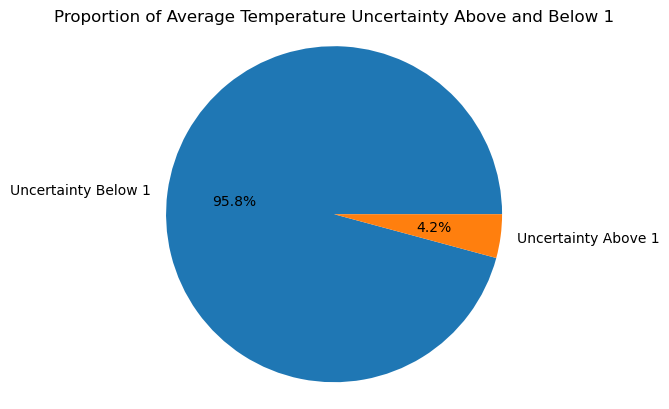

In [18]:
# Create a new column indicating whether the average temperature uncertainty is above or below 1
cities['UncertaintyAbove1'] = cities['AverageTemperatureUncertainty'] > 1

# Count the number of rows where the average temperature uncertainty is above and below 1
uncertainty_counts = cities['UncertaintyAbove1'].value_counts()

# Create a pie chart showing the proportion of average temperature uncertainty values above and below 1
plt.pie(uncertainty_counts, labels=['Uncertainty Below 1', 'Uncertainty Above 1'], autopct='%1.1f%%')
plt.title('Proportion of Average Temperature Uncertainty Above and Below 1')
plt.axis('equal')
plt.show()

# Building a linear regression model on temperature data 

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# convert date column to datetime format
cities["dt"] = pd.to_datetime(cities["dt"]) 
# extract year from date column
cities["year"] = cities["dt"].dt.year 
# aggregate data by year
cities = cities.groupby("year")["AverageTemperature"].mean().reset_index() 

cities.describe

<bound method NDFrame.describe of      year  AverageTemperature
0    1900           17.622511
1    1901           17.469447
2    1902           17.442242
3    1903           17.381779
4    1904           17.198060
..    ...                 ...
109  2009           18.601106
110  2010           18.553508
111  2011           18.393315
112  2012           18.525969
113  2013           18.834252

[114 rows x 2 columns]>

In [20]:
cities.describe

<bound method NDFrame.describe of      year  AverageTemperature
0    1900           17.622511
1    1901           17.469447
2    1902           17.442242
3    1903           17.381779
4    1904           17.198060
..    ...                 ...
109  2009           18.601106
110  2010           18.553508
111  2011           18.393315
112  2012           18.525969
113  2013           18.834252

[114 rows x 2 columns]>

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(cities.columns)
cities = cities.dropna()
print(cities.isnull().sum())

cities = cities.groupby('year')['AverageTemperature'].mean().reset_index()
X = cities['year'].values.reshape(-1, 1)
y = cities['AverageTemperature'].values

Index(['year', 'AverageTemperature'], dtype='object')
year                  0
AverageTemperature    0
dtype: int64


# Train and Test Split of dataset into 80:20

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)
pred_model= LinearRegression()


# Model Fitting 

In [23]:
pred_model.fit(X_train,y_train)
model = pred_model.predict(X_test)
cities['pred'] = pred_model
print("The prediction values of the temperature are" ,model)

The prediction values of the temperature are [18.12377366 17.34975148 17.71639357 18.01174414 17.4108585  17.76731608
 18.02192864 17.98119063 17.78768508 17.421043   18.30709471 17.67565556
 18.15432717 18.44967774 17.49233452 17.30901347 18.04229764 17.57381053
 18.13395817 17.8487921  18.35801722 18.23580319 17.4312275  17.62473305
 17.99137513 18.43949324 18.40893973 17.53307253 17.75713158 18.39875523
 18.10340466 17.46178101 17.61454854 18.36820172 17.40067399 17.64510205
 17.94045262 17.97100613 17.59417954 17.73676257 17.35993598 17.8691611
 17.96082162 17.70620907 17.66547106 17.47196551 18.33764821 17.65528655
 17.87934561 17.38030499 17.74694708 18.00155963 18.17469617 17.58399504
 17.50251902 18.22561869 18.2765412  17.56362603 17.39048949 18.16451167
 17.80805409 17.441412   18.11358916 17.55344153 17.33956698 17.48215001
 17.69602456 18.25617219 17.37012049 18.05248215 18.2969102  18.21543418
 17.8589766  17.81823859 18.08303565 17.77750058 18.09322016 17.93026812
 18.429

# Results of Linear Regression Model

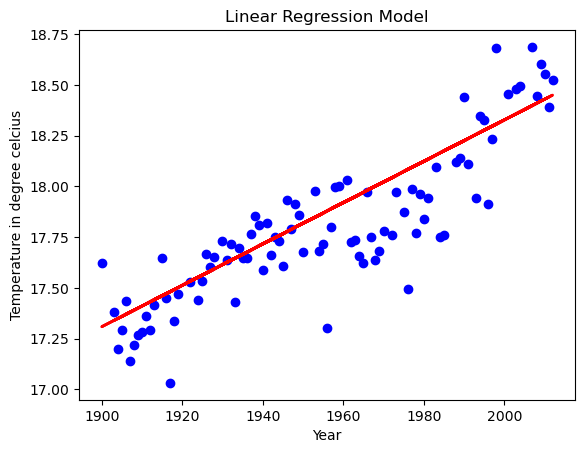

In [29]:
import matplotlib.pyplot as plt
y_pred = pred_model.predict(X_test)

# Plot the data points
plt.scatter(X_test, y_test, color='blue')

# Plot the linear regression line
plt.plot(X_test, y_pred, color='red', linewidth=2)

# Add labels and title to the plot
plt.xlabel('Year')
plt.ylabel('Temperature in degree celcius')
plt.title('Linear Regression Model')

# Show the plot
plt.show()

# Mean squared error (MSE)

In [30]:
y_pred = pred_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.03934226585629664


# R-squared and adjusted R-squared values for the linear regression model.

In [32]:
from sklearn.metrics import r2_score

y_pred = pred_model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

n = len(X_test) # number of samples
p = 1 # number of independent variables
adj_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
print('Adjusted R-squared:', adj_r_squared)


R-squared: 0.7109131654750815
Adjusted R-squared: 0.7077010895359158
